In [1]:
import os 
import time 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

%matplotlib inline

import librosa
import IPython.display as ipd
from scipy.io import wavfile
import librosa.display
import re


from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers
import keras
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

<br>
<br>
<hr>
<br>

This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. We can change this behavior by resampling at 44.1KHz.



The <b> sample rate (sr) </b> is the number of samples of audio carried per second, measured in Hz or kHz. 


In [2]:
# carregando aúdio 
path = "/content/drive/MyDrive/Deep_Learning-ASR/dataset/Audio_Speech_Actors_01-24/Actor_04/03-01-07-02-01-02-04.wav"
x, sr = librosa.load(path, mono=True)

In [3]:
sr, x

(22050, array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.6500063e-06, -1.3668368e-05,  0.0000000e+00], dtype=float32))

In [4]:
# amostra de aúdio 
ipd.Audio("/content/drive/MyDrive/Deep_Learning-ASR/dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-05-01-02-01-01.wav", autoplay=False)

In [5]:
ipd.Audio("/content/drive/MyDrive/Deep_Learning-ASR/dataset/Audio_Speech_Actors_01-24/Actor_04/03-01-07-02-01-02-04.wav", autoplay=False)

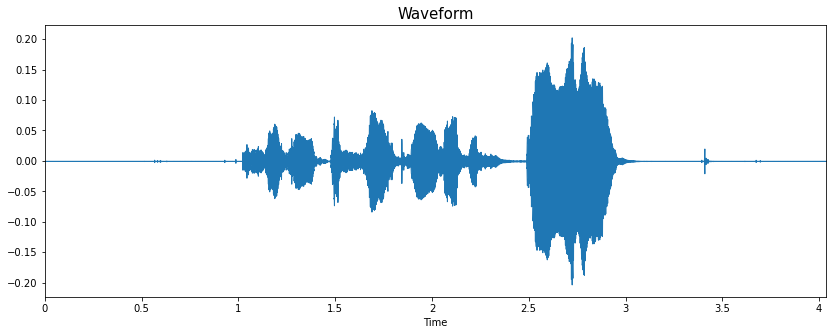

In [6]:
# waveform plot (amplitude, wavelenght and phase)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.title("Waveform", fontsize=15)
plt.show()

<br>

The <b> librosa.stft is a Short-time Fourier transform </b> The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.


The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. 

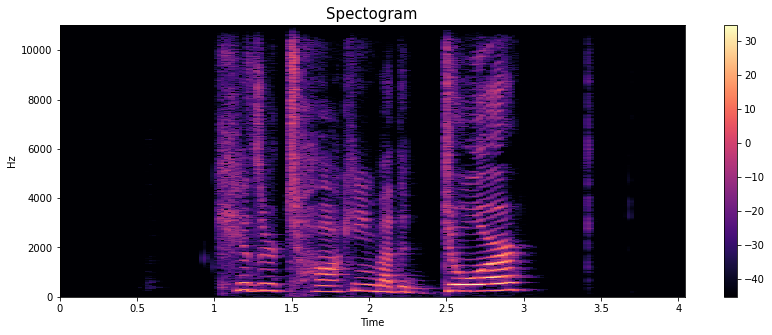

In [7]:
X = librosa.stft(x)
X_db = librosa.amplitude_to_db(abs(X))

# create spectogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(X_db, sr=sr, x_axis='time', y_axis='hz')
plt.title("Spectogram", fontsize=15)
plt.colorbar()
plt.show()

In [8]:
# spectral centroids (feature extraction)
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(174,)

In [9]:
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

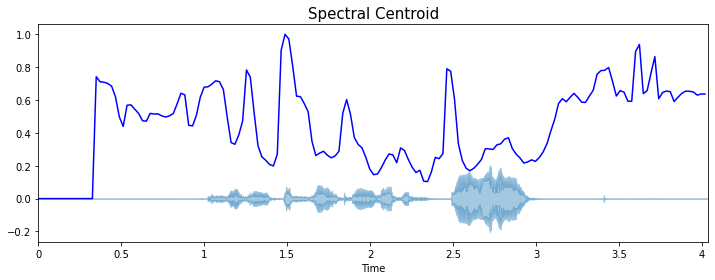

In [10]:
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames=range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
plt.title("Spectral Centroid", fontsize=15)
plt.show()

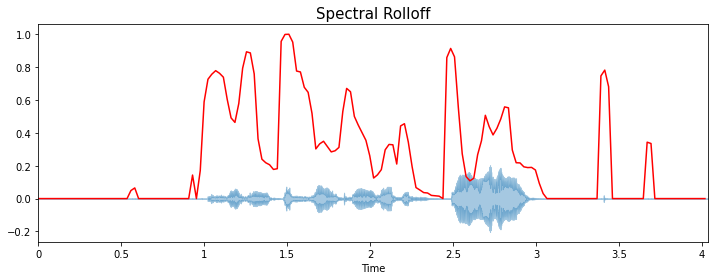

In [11]:
# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.title("Spectral Rolloff", fontsize=15)
plt.show()

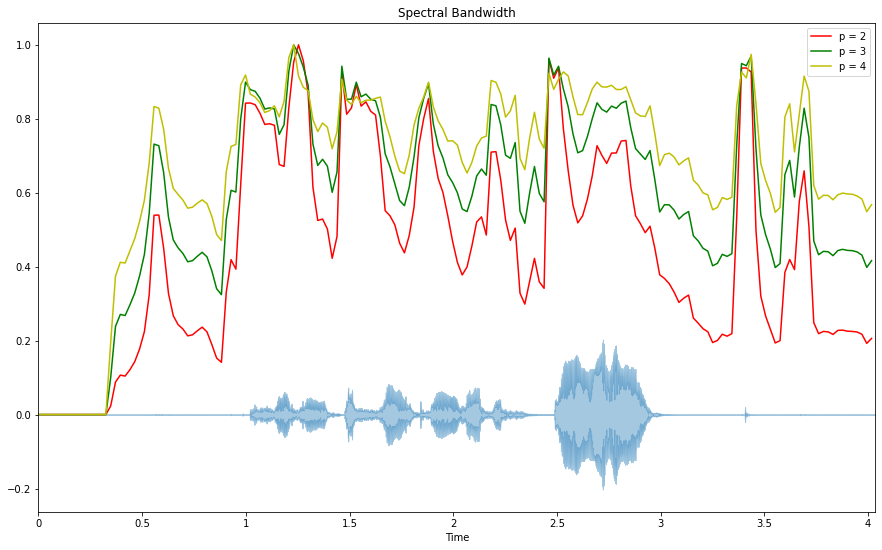

In [12]:
# Spectral Bandwidth

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]


plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.title("Spectral Bandwidth")
plt.legend(('p = 2', 'p = 3', 'p = 4'))
plt.show()

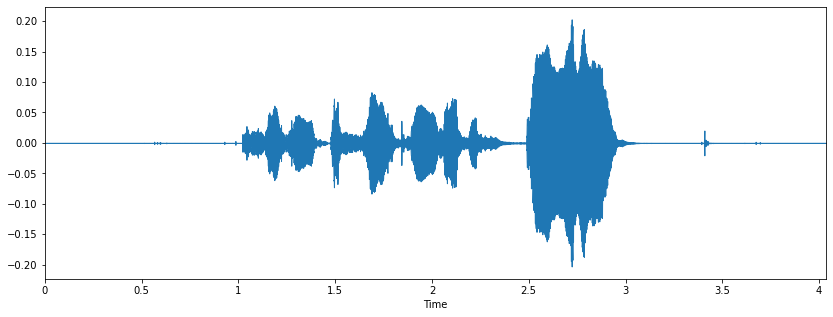

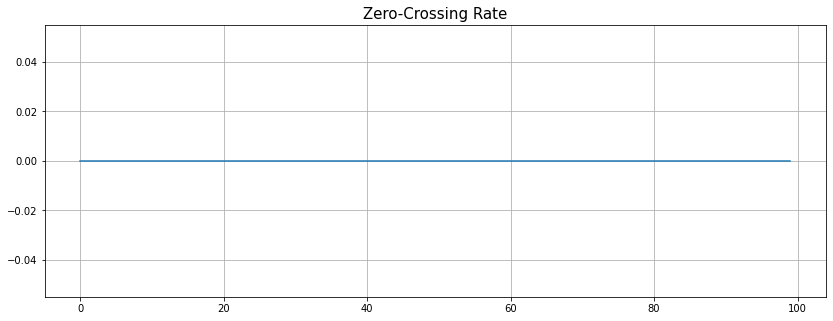

In [13]:
# Zero-Crossing Rate 

x, sr = librosa.load("/content/drive/MyDrive/Deep_Learning-ASR/dataset/Audio_Speech_Actors_01-24/Actor_04/03-01-07-02-01-02-04.wav")

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.title("Zero-Crossing Rate", fontsize=15)
plt.grid()
plt.show()

In [14]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

0


(20, 174)


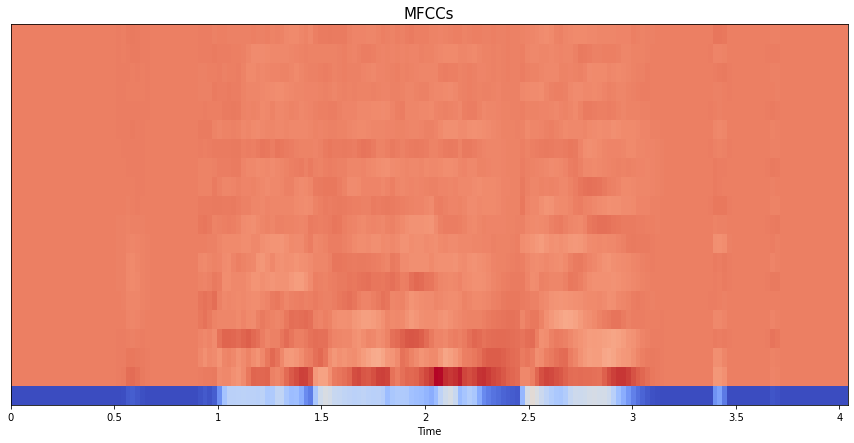

In [15]:
# Mel-Frequency Cepstral Coefficients(MFCCs)


mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)



#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.title("MFCCs", fontsize=15)
plt.show()

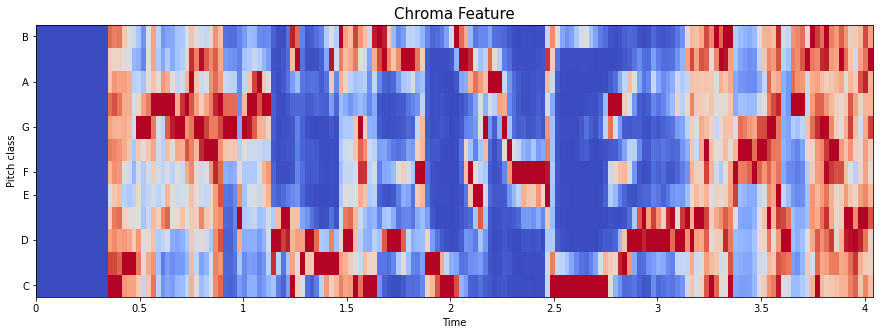

In [16]:
# Chroma feature
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=512)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
plt.title("Chroma Feature", fontsize=15)
plt.show()

<br>
<br>
<br>
<hr>
<br>
<br>



### Dataset 

<br>

In [17]:
dataset_path = "/content/drive/MyDrive/Deep_Learning-ASR/dataset/Audio_Speech_Actors_01-24/"
os.listdir(dataset_path)

['Actor_21',
 'Actor_16',
 'Actor_17',
 'Actor_20',
 'Actor_15',
 'Actor_23',
 'Actor_18',
 'Actor_19',
 'Actor_24',
 'Actor_22',
 'Actor_08',
 'Actor_10',
 'Actor_05',
 'Actor_14',
 'Actor_09',
 'Actor_13',
 'Actor_11',
 'Actor_12',
 'Actor_07',
 'Actor_06',
 'Actor_04',
 'Actor_01',
 'Actor_02',
 'Actor_03']

In [18]:
# loading data 
audio_data = []
label = []
folders = []


for folder in os.listdir(dataset_path):
  for dir in os.listdir(dataset_path + folder):
    audio_data.append(dataset_path + folder + "/" +  dir)
    audio_classes = dir[6:8]
    if audio_classes == '01':
      label.append("neutral")
    elif audio_classes == '02':
      label.append('calm')
    elif audio_classes == '03':
      label.append('happy')
    elif audio_classes == '04':
      label.append('sad')
    elif audio_classes == '05':
      label.append('angry')
    elif audio_classes == '06':
      label.append('fearful')
    elif audio_classes == '07':
      label.append('disgust')
    elif audio_classes == '08':
      label.append('surprised')
    else: 
      label.append('another')

In [19]:
len(label)

1440

In [20]:
index_list = [i for i in range(0, 1440, 1)]
len(index_list)

1440

In [21]:
df_novo = pd.DataFrame({"index": index_list,  "Audio": audio_data, "Label": label})

In [22]:
df_novo.dtypes

index     int64
Audio    object
Label    object
dtype: object

In [23]:
df_novo['Label'].value_counts()

surprised    192
angry        192
sad          192
disgust      192
fearful      192
happy        192
calm         192
neutral       96
Name: Label, dtype: int64

In [24]:
df_novo['Audio'] = df_novo["Audio"].astype(str)

In [25]:
df_novo.head()

,index,Audio,Label
0,0,/content/drive/MyDrive/Deep_Learning-ASR/datas...,calm
1,1,/content/drive/MyDrive/Deep_Learning-ASR/datas...,neutral
2,2,/content/drive/MyDrive/Deep_Learning-ASR/datas...,neutral
3,3,/content/drive/MyDrive/Deep_Learning-ASR/datas...,neutral
4,4,/content/drive/MyDrive/Deep_Learning-ASR/datas...,neutral


In [26]:
audio = df_novo['Audio'][0]

In [27]:
ipd.Audio(data=audio, autoplay=True)

In [28]:
df_novo[df_novo['Label']=='neutral']

,index,Audio,Label
1,1,/content/drive/MyDrive/Deep_Learning-ASR/datas...,neutral
2,2,/content/drive/MyDrive/Deep_Learning-ASR/datas...,neutral
3,3,/content/drive/MyDrive/Deep_Learning-ASR/datas...,neutral
4,4,/content/drive/MyDrive/Deep_Learning-ASR/datas...,neutral
60,60,/content/drive/MyDrive/Deep_Learning-ASR/datas...,neutral
...,...,...,...
1329,1329,/content/drive/MyDrive/Deep_Learning-ASR/datas...,neutral
1381,1381,/content/drive/MyDrive/Deep_Learning-ASR/datas...,neutral
1382,1382,/content/drive/MyDrive/Deep_Learning-ASR/datas...,neutral
1383,1383,/content/drive/MyDrive/Deep_Learning-ASR/datas...,neutral


In [29]:
audio_sample = df_novo[df_novo['index']==29]

In [30]:
ipd.Audio(filename=audio, autoplay=True)

In [31]:
len(audio_data)

1440

In [32]:
sample = audio_data[0]

In [33]:
ipd.Audio(sample, autoplay=True)

In [34]:
df_novo['Label'].value_counts()

surprised    192
angry        192
sad          192
disgust      192
fearful      192
happy        192
calm         192
neutral       96
Name: Label, dtype: int64

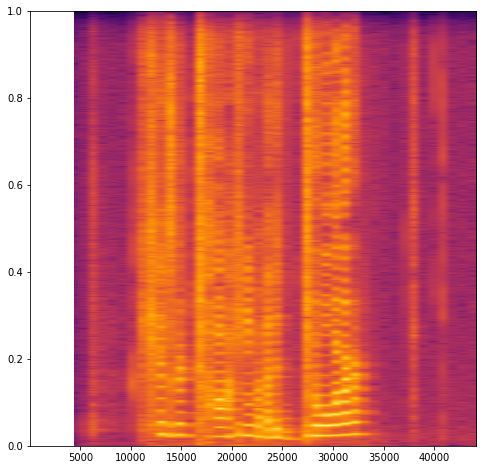

In [36]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
plt.specgram(x, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');

<br>
<br>
<br>
<hr>
<br>
<br>
<br>

In [37]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [38]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [39]:
# audio feature extraction (csv file) 

%%time 

audio_data = []
folders = []


for folder in os.listdir(dataset_path):
  for dir in os.listdir(dataset_path + folder):
      audio_data.append(dataset_path + folder + "/" +  dir)
      audio_classes = dir[6:8]
      audio_songs = dataset_path + folder + "/" +  dir
      if audio_classes == '01':
        label = "neutral"
      elif audio_classes == '02':
        label = 'calm'
      elif audio_classes == '03':
        label = 'happy'
      elif audio_classes == '04':
        label = 'sad'
      elif audio_classes == '05':
        label = 'angry'
      elif audio_classes == '06':
        label = 'fearful'
      elif audio_classes == '07':
        label = 'disgust'
      elif audio_classes == '08':
        label = 'surprised'
      else: 
        label = 'another'
      
      y, sr = librosa.load(audio_songs, mono=True, duration=30)
      rmse = librosa.feature.rms(y=y)[0]
      chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
      spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
      spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
      rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
      zcr = librosa.feature.zero_crossing_rate(y)
      mfcc = librosa.feature.mfcc(y=y, sr=sr)
      to_append = f'{dir} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
      for e in mfcc:
          to_append += f' {np.mean(e)}'
      to_append += f' {label}'
      file = open('dataset.csv', 'a', newline='')
      with file:
          writer = csv.writer(file)
          writer.writerow(to_append.split())

CPU times: user 6min 57s, sys: 3min 44s, total: 10min 41s
Wall time: 6min 33s


In [40]:
data = pd.read_csv('dataset.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,03-01-02-01-01-02-21.wav,0.516996,0.004421,2636.737044,2507.909095,5208.919177,0.279176,-610.128784,78.063225,4.134748,15.170993,11.708098,-5.523873,0.918714,-6.096364,-7.619123,0.766855,0.155506,-2.539271,0.558620,4.220088,-2.959687,-1.045182,-2.758806,1.638972,-1.893382,-1.093617,calm
1,03-01-01-01-02-02-21.wav,0.528680,0.005141,2689.644726,2541.766579,5458.802421,0.322069,-611.755615,67.977806,3.121809,13.146459,10.355461,-0.370949,0.218376,-7.051206,-9.236593,0.827084,-0.697987,-2.262972,-1.047295,2.083279,-1.703542,-1.518317,-3.450431,0.546472,-1.478653,-1.477554,neutral
2,03-01-01-01-01-01-21.wav,0.514040,0.005617,2635.308499,2617.477267,5518.337314,0.318498,-593.692200,66.016129,3.537092,13.301965,8.731569,-5.703422,3.174864,-3.922184,-9.186675,-0.027222,-0.879789,-3.754386,-1.044609,2.080261,-2.529024,-1.679426,-3.109142,-0.230661,-1.051353,-0.647632,neutral
3,03-01-01-01-02-01-21.wav,0.532919,0.006433,2734.999876,2554.096010,5534.447303,0.329787,-608.888916,69.637169,3.554751,13.892525,8.201989,-2.233725,2.007862,-6.408333,-10.408377,-0.435316,0.105930,-2.795937,-3.397642,1.992619,-1.477771,-0.405050,-0.718138,1.213975,-1.089819,-1.226312,neutral
4,03-01-01-01-01-02-21.wav,0.521122,0.005406,2486.215290,2542.786889,5227.498041,0.268086,-598.349731,70.244011,8.876153,16.949705,8.628273,-2.792028,3.885571,-4.684643,-8.017392,1.051202,0.572896,-2.047774,-0.011679,3.233717,-1.222854,-0.167921,-1.930460,0.821717,0.331319,-0.583243,neutral


In [41]:
data['label'].value_counts()

surprised    192
angry        192
sad          192
disgust      192
fearful      192
happy        192
calm         192
neutral       96
Name: label, dtype: int64

In [42]:
data.drop(['filename'], axis=1, inplace=True)

In [43]:
# encoding 
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [44]:
X_train.shape, X_test.shape

((1008, 26), (432, 26))

In [45]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.30))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6912      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [47]:
%%time 
classifier = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/50
8/8 [==============================] - 2s 46ms/step - loss: 2.6482 - accuracy: 0.1457 - val_loss: 2.1459 - val_accuracy: 0.2523
Epoch 2/50
8/8 [==============================] - 0s 14ms/step - loss: 1.9476 - accuracy: 0.3294 - val_loss: 2.0887 - val_accuracy: 0.3241
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 1.7015 - accuracy: 0.4040 - val_loss: 2.0391 - val_accuracy: 0.3426
Epoch 4/50
8/8 [==============================] - 0s 16ms/step - loss: 1.5246 - accuracy: 0.4769 - val_loss: 1.9864 - val_accuracy: 0.4028
Epoch 5/50
8/8 [==============================] - 0s 13ms/step - loss: 1.4173 - accuracy: 0.5057 - val_loss: 1.9486 - val_accuracy: 0.3981
Epoch 6/50
8/8 [==============================] - 0s 13ms/step - loss: 1.2877 - accuracy: 0.5743 - val_loss: 1.9054 - val_accuracy: 0.4352
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: 1.1844 - accuracy: 0.6115 - val_loss: 1.8498 - val_accuracy: 0.4537
Epoch 8/50
8/8 [===========

In [48]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.9787 - accuracy: 0.6921


[0.9786627292633057, 0.6921296119689941]

In [49]:
from sklearn.metrics import classification_report

In [50]:
class_names = ["neutral", "calm", "happy", "sad", "angry", "fearful", "disgust", "surprised"]

In [51]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     neutral       0.74      0.74      0.74        61
        calm       0.78      0.85      0.81        59
       happy       0.73      0.66      0.69        61
         sad       0.73      0.65      0.69        51
       angry       0.68      0.68      0.68        77
     fearful       0.39      0.74      0.51        19
     disgust       0.68      0.54      0.60        50
   surprised       0.69      0.70      0.70        54

    accuracy                           0.69       432
   macro avg       0.68      0.69      0.68       432
weighted avg       0.70      0.69      0.69       432



In [52]:
!pip install mlxtend --upgrade --no-deps

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


In [53]:
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

In [54]:
import mlxtend
mlxtend.__version__

'0.18.0'

In [55]:
labels = ["neutral", "calm", "happy", "sad", "angry", "fearful", "disgust", "surprised"]
cm = confusion_matrix(y_test, y_pred)

<Figure size 864x432 with 0 Axes>

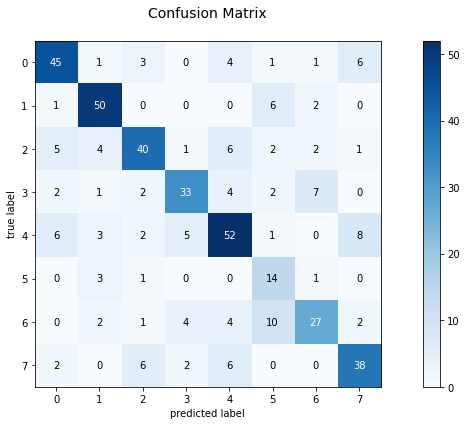

In [56]:
plt.figure(figsize=(12,6))

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize=(12, 6),
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                )
plt.title("Confusion Matrix", fontsize=14)
plt.tight_layout()
plt.show()

<br>
<br>
<br>
<hr>
<br>
<br>